<a href="https://colab.research.google.com/github/shazam-25/ML-Projects/blob/main/diamond_cut_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries/Dataset


**Section includes:**
*   Libraries used for Exploratory Data Analysis, Data Transformation, Feature Engineering, Data split and Model Building.
*   Importing diamond dataset as pandas dataframe for efficient data exploration and manipulation.
*   Splitting dataset into train and test to fit the ML model based on the transformed training data in order to avoid overfitting.

  

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_point
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# import dataset
diamonds = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/ML_assign/Diamonds Dataset.xlsx')) # import data into pandas dataframe

# 2. Data Visualization and Exploration

**A. Data Exploration includes:**
1.   Printing the first 5 rows of the data
2.   Metadata (i.e. columns, count, null-values and data types)
3.   Statistical information of the data
4.   Shape of the data



***First 5 rows of the data:***

In [ ]:
# print the first 5 rows
print(f'Data:\n{diamonds.head()}')

Data:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


***Data information:***

In [ ]:
# print count of missing or null values as well as data types for each column
print(f'Data Info:\n{diamonds.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
Data Info:
None


***Statistical description of the data:***

In [ ]:
# print description of the data
print(f'Data description:\n{diamonds.describe()}')

Data description:
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.54000

***Observations from the statistical information:***
1.   No missing or null values
2.   Outliers are present
3.   Data is skewed
   


***Shape of the data:***

In [ ]:
# print shape of the data
print(f'Shape:\n{diamonds.shape}')

Shape:
(53940, 10)


*Create a list of categorical, numerical and dimensional features.*

In [ ]:
# categorize the categorical and numerical features
categorical_cols=diamonds.select_dtypes(include=['object']).columns
numerical_cols=diamonds.select_dtypes(include=['number']).columns
dimensional_variables=['x','y','z']

print(f'Categorical columns:{categorical_cols}\nNumerical columns: {numerical_cols}\nDimensional columns:{dimensional_variables}')

Categorical columns:Index(['cut', 'color', 'clarity'], dtype='object')
Numerical columns: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Dimensional columns:['x', 'y', 'z']


**B. Data Visualization**
1.   Count plot for Categorical variables
2.   Histogram for Numerical variables
3. Boxplot for Numerical variables


***Count plot for Categorical variables***

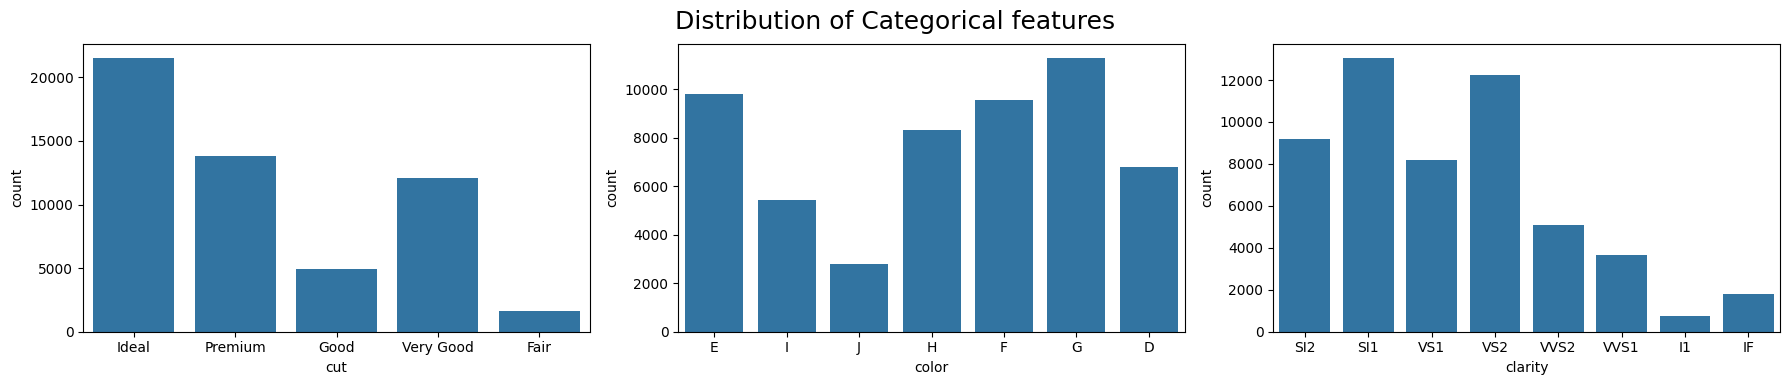

In [ ]:
# categorical variable distribution
# obtain the distribution of all the categorical features in the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[18,4])
plt.suptitle('Distribution of Categorical features',y=0.95, fontsize=18) # title for the chart
i=0
for col in categorical_cols:
  sns.countplot(ax=axes[i], x=diamonds[col]) # countplot for categorical features
  i+=1
plt.tight_layout()

***Observation:***
1. The dataset contains super-quality diamonds in terms of their cut; ‘Premium’ &
‘Ideal’ diamonds are most abundant.

2. Diamonds with color rating ‘G’ are highest in number followed by ‘E’. D-F color rating diamonds are colorless, hence of better standards.

3. “IF”, ‘Internally Flawless’ diamonds are the best in terms of clarity and they have the second lowest count in our dataset.





***Histogram for Numerical variables***

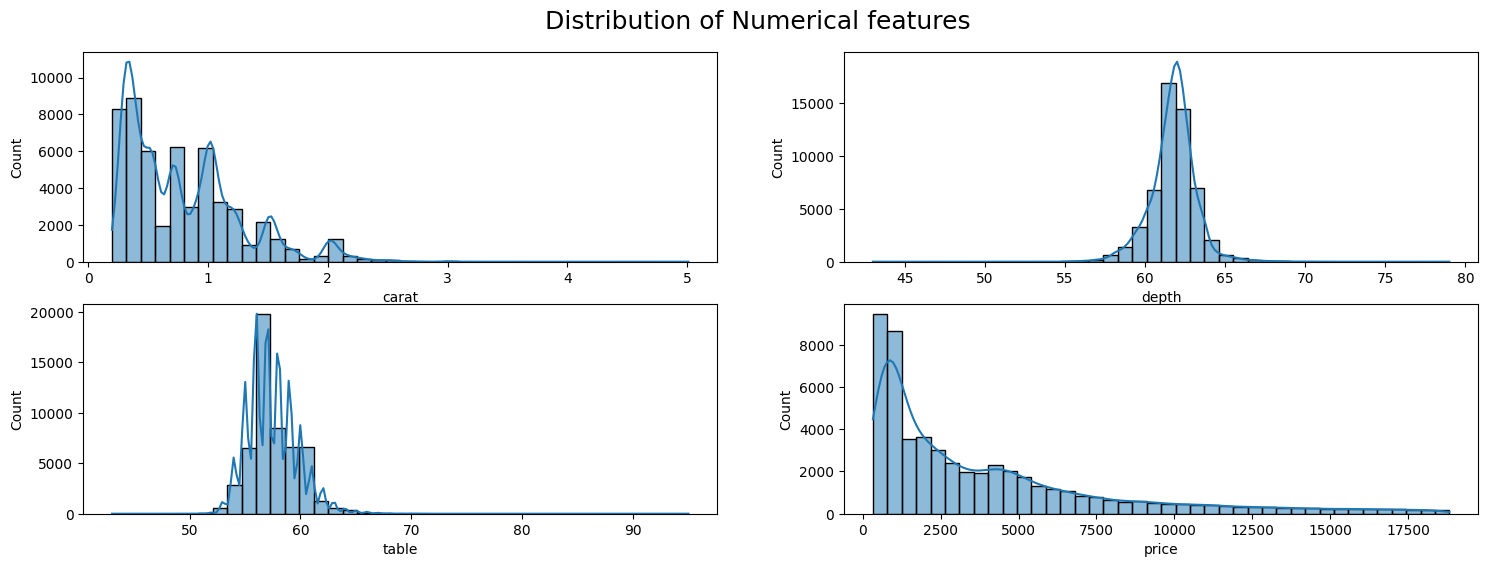

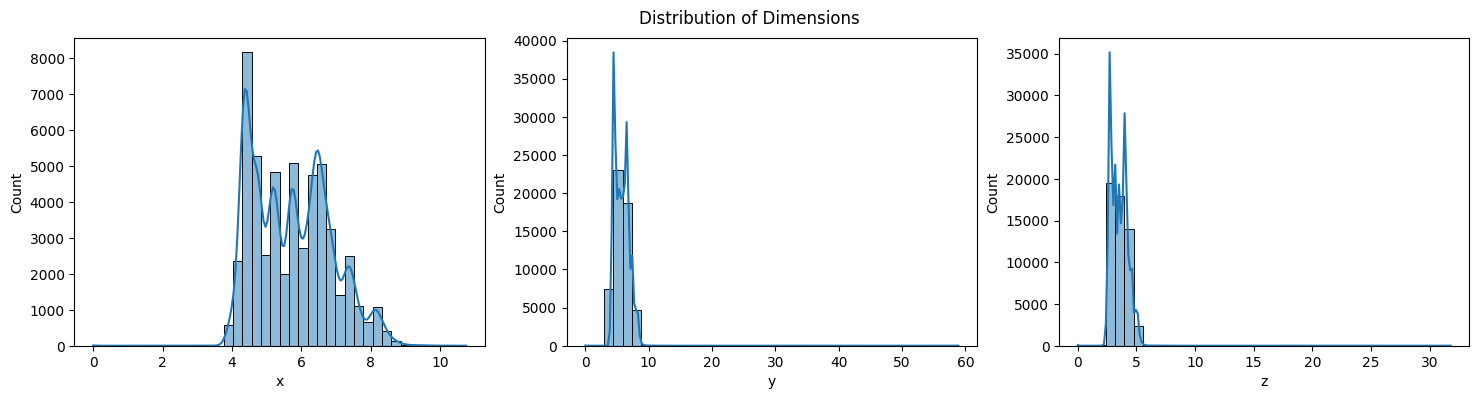

In [ ]:
# numerical feature distribution
# obtain the distribution of all the numerical features in the data

# for 'carat','depth','table','price'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[18,6])
plt.suptitle('Distribution of Numerical features',y=0.95, fontsize=18) # title for the chart
k=0
for i in range(2):
  for j in range(2):
    sns.histplot(data=diamonds[numerical_cols[k]], bins=40, kde=True, ax=axes[i,j]) # histogram
    k+=1
plt.show()

# for dimensional columns - 'x','y','z'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[18,4])
plt.suptitle('Distribution of Dimensions',y=0.95, fontsize=12)
k=0
for ax in axes:
  sns.histplot(data=diamonds[dimensional_variables[k]], bins=40, kde=True, ax=ax) # histogram
  k+=1
plt.show()

***Observation:***
1. Features 'carat' and 'price' are right skewed i.e. mean > median
2. Features 'depth' and 'table' are kind of normalize
3. There are outliers present in each numerical features



***Boxplot for Numerical variables***

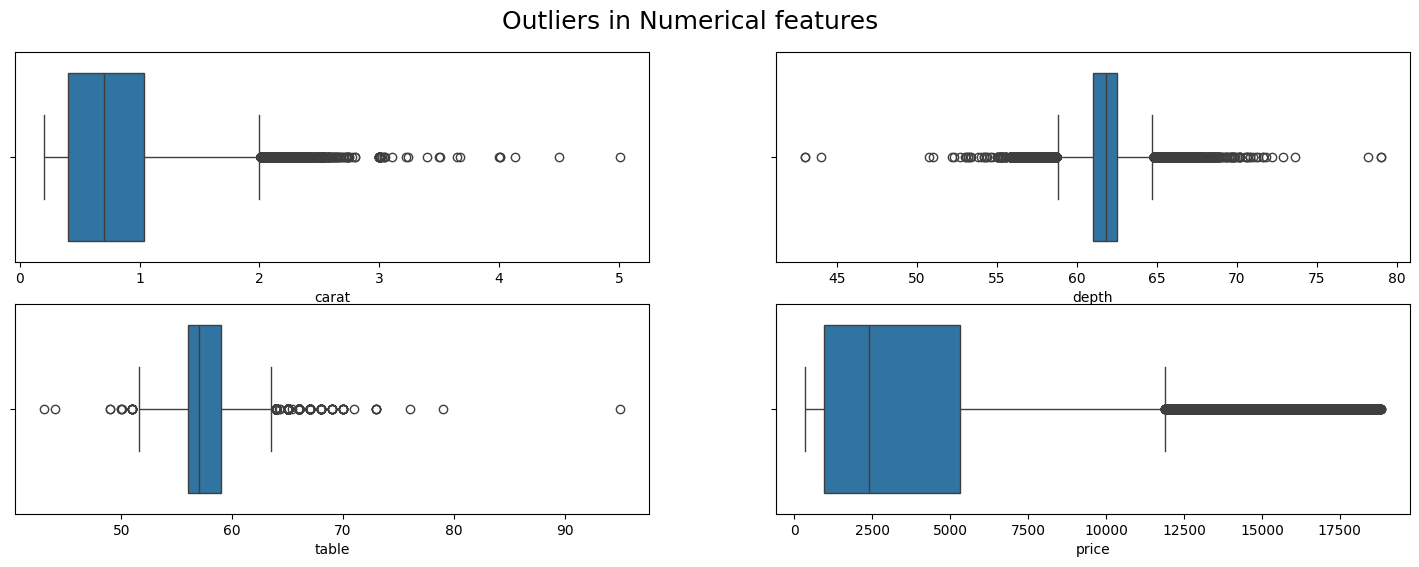

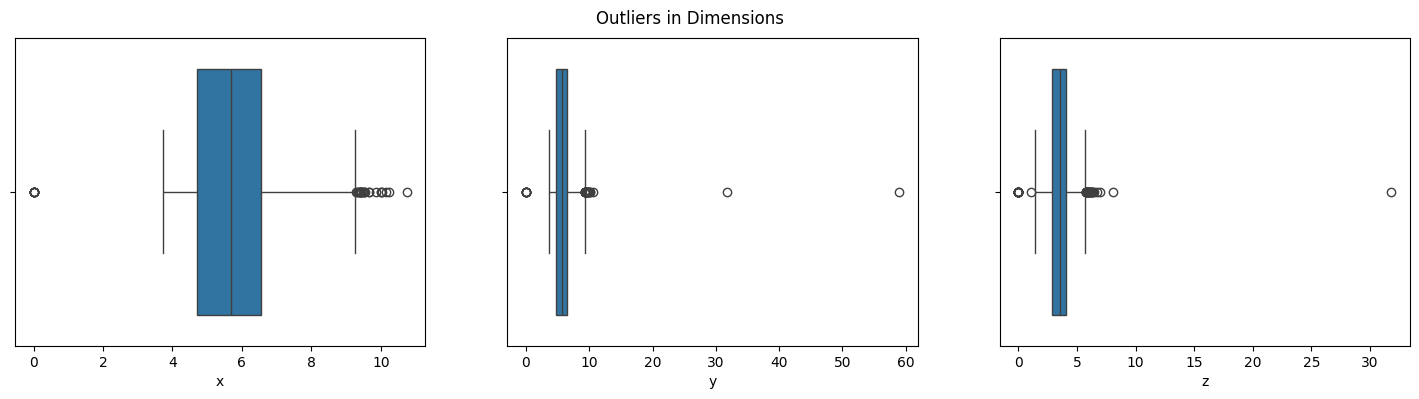

In [ ]:
# numerical feature distribution
# obtain the outliers of the features

# for 'carat','depth','table','price'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[18,6])
plt.suptitle('Outliers in Numerical features',y=0.95, fontsize=18) # title for the chart
k=0
for i in range(2):
  for j in range(2):
    sns.boxplot(data=diamonds, x=numerical_cols[k], ax=axes[i,j]) # boxplot to detect the outliers
    k+=1
plt.show()

# for dimensional columns - 'x','y','z'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[18,4])
plt.suptitle('Outliers in Dimensions',y=0.95, fontsize=12)
k=0
for ax in axes:
  sns.boxplot(data=diamonds, x=dimensional_variables[k], ax=ax) # boxplot to detect the outliers
  k+=1
plt.show()

***Observation:***
1. Features 'depth' and 'table' have a range from approx. 55-65
2. There are dimensions having zero-value
3. Features 'carat' and 'price' have outliers lying on the right on the Q3-value

# 3. Correlation Analysis

**Will this correlational analysis have effect on feature selection that you will perform in the next step?**
1.   Helps in understanding the strength and direction of a relationship between two variables.
2.   During Feature selection, features having strong correlation to the target variable is informative for prediction.
3. Whereas, features having weak correlation to the target variable can be removed.



**A. Correlation Analysis between Cut and Numeric features**

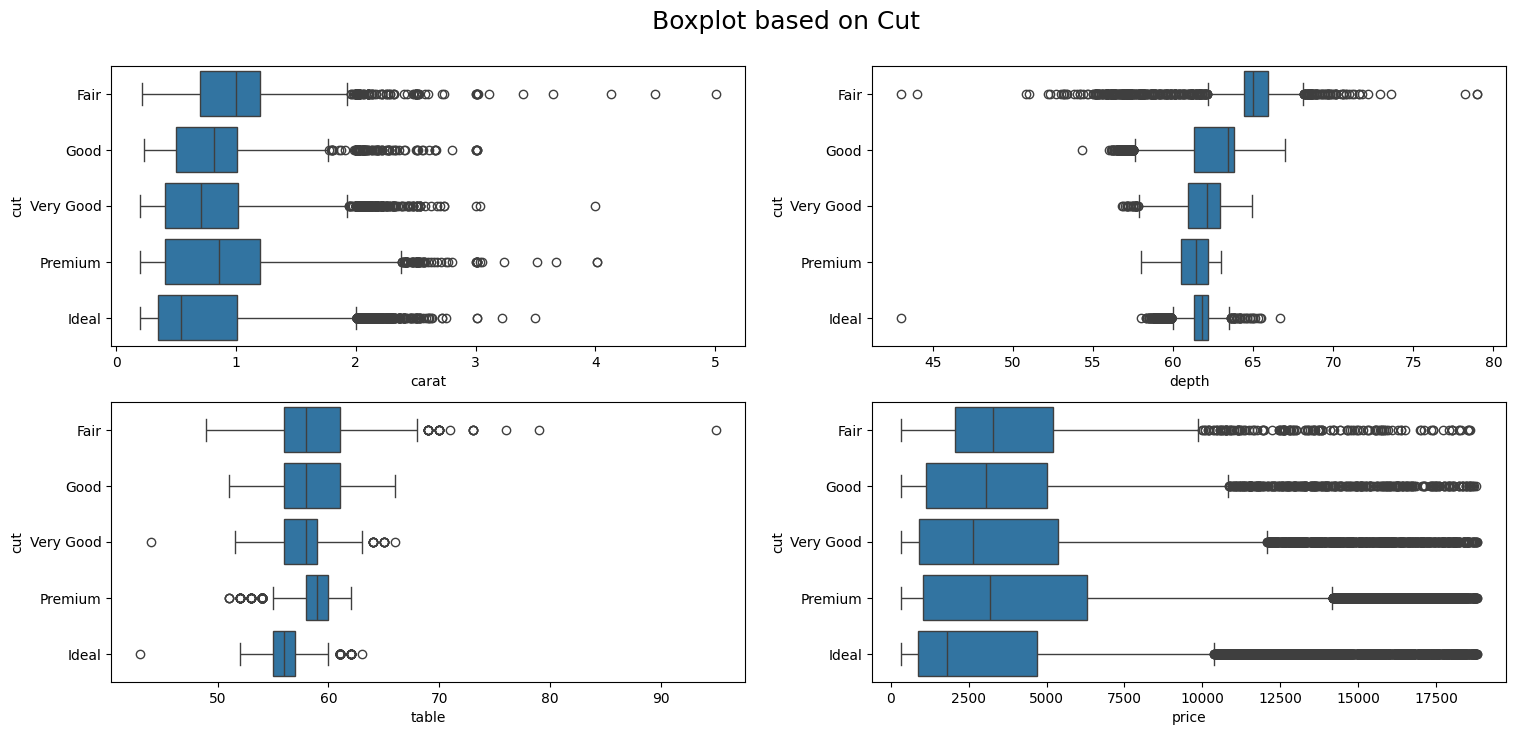

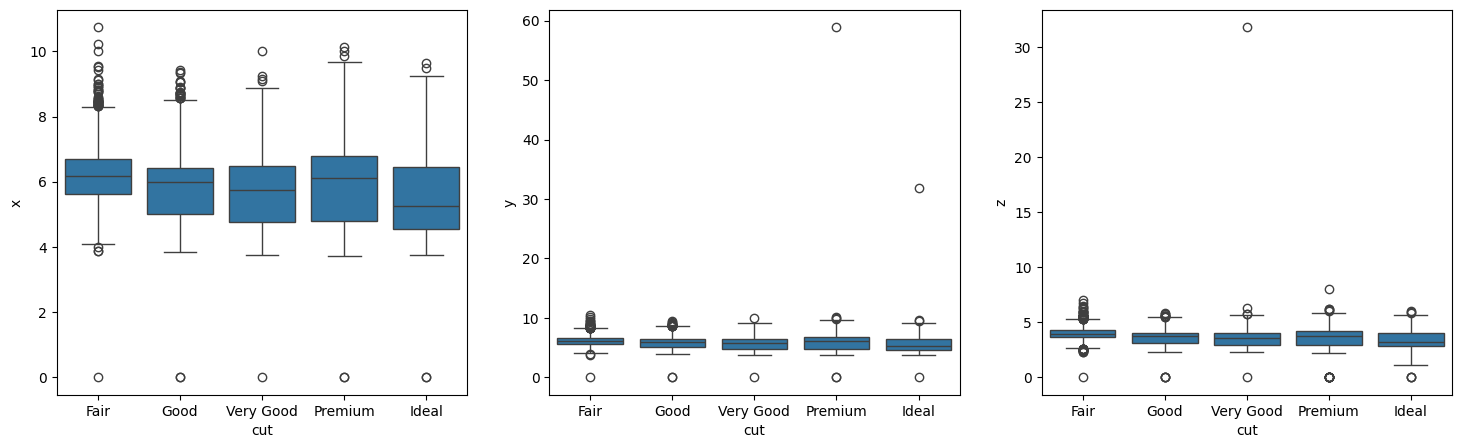

In [ ]:
# Boxplots of Numeric features based on cut

# For numeric features 'carat', 'depth','table' and 'price'
fig, axes = plt.subplots(2, 2, figsize=[18,8])
plt.suptitle('Boxplot based on Cut',y=0.95, fontsize=18)
k=0
for i in range(2):
  for j in range(2):
    sns.boxplot(y='cut', x=numerical_cols[k], data=diamonds,
                order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ax=axes[i,j])
    k+=1
plt.show()

# For dimensional features
fig, axes = plt.subplots(1, 3, figsize=[18,5])
#plt.suptitle('Boxplot based on Cut',y=0.95, fontsize=18)
k=0
for ax in axes:
  sns.boxplot(x='cut', y=dimensional_variables[k], data=diamonds,
              order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ax=ax)
  k+=1
plt.show()

***Observation:***
1. The 'Premium' quality cut diamonds do not have any outliers present w.r.t 'depth'.
2. Similarly, the 'Good' quality cut diamonds do not have any outliers w.r.t. table.
3. Based on dimensions, every cut quality has zero-value dimensions which is not possible.

**B. Correlational Analysis of the Data**

***Encoding Categorical features using Ordinal encoding technique***

---
***Justification for Oridnal Encoding:***
*   Converts categorical features into numeric
*   Encodes the categories based on the order or ranks
*   Suitable for handling ordinal data





In [ ]:
# Before encoding, check for inconsistency
#Print unique values of the categorical features in training set
for col in categorical_cols:
  print(f'{col} unique:{diamonds[col].unique()}')
#Later all the categorical values needs to be encoded

cut unique:['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color unique:['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity unique:['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [ ]:
# Create a copy to avoid changing the original data
diamonds_copy = diamonds.copy()

In [ ]:
# order the categories of clarity, color and cut from worst to best
category_clarity = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
category_color = ['J','I','H','G','F','E','D']
category_cut = ['Fair','Good','Very Good','Premium','Ideal']
category_dict = {'clarity':category_clarity, 'color':category_color, 'cut':category_cut}

In [ ]:
# Ordinal Encoding
for col in category_dict:
  ordinal_encoder = OrdinalEncoder(categories=[category_dict[col]])
  ordinal_encoder.fit_transform(diamonds_copy[[col]])
  diamonds_copy[col] = ordinal_encoder.transform(diamonds_copy[[col]])

***Heatmap to visualize the correlation b/w cut quality and other features***

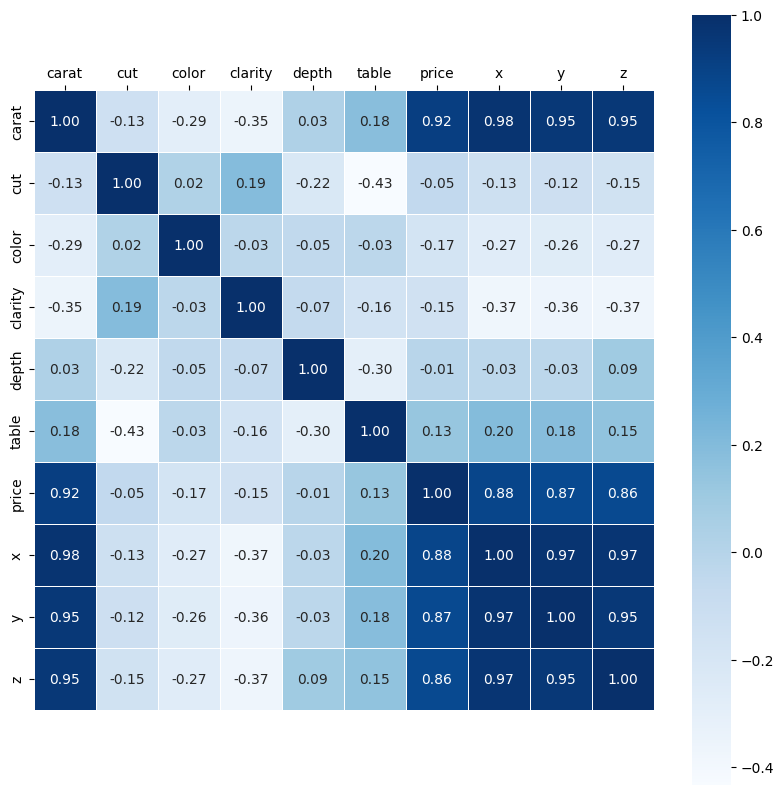

In [ ]:
# Heatmat-To calculate correlation
fig, ax = plt.subplots(figsize=[10, 10])
ax = sns.heatmap(diamonds_copy.corr(numeric_only=True), annot=True, cmap='Blues', linewidths=.5, fmt=".2f", square=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

***Observation:***  
1. From the above chart, target 'cut' has a positive correlation with features 'color' and 'clarity'.
2. Feature 'cut' has lowest correlation with 'color' and 'price'.
3. Dimensional features [x,y,z] can be combined to form a new feature,
which may get us the average correlation between 'cut' and new_feature.






# 4.	Data Pre-processing and cleaning

---
***Steps:***                      
A. Data Cleaning                                    
B. Feature Engineering


**A. Data Cleaning**
1.   Detect and remove duplicate records
2.   Detect and replace outliers using Interquartile Range(IQR)

***Detect and remove duplicates***

In [ ]:
#Check for duplicate entries in training set
print('Checking for duplicate entries in training set')
print(f'Before removing duplicates:{diamonds_copy.shape}')
print(f'Total Duplicate records: {diamonds_copy.duplicated().sum()}')
#Drop duplicate
diamonds_copy = diamonds_copy.drop_duplicates()
print(f'After removing duplicates:{diamonds_copy.shape}')

Checking for duplicate entries in training set
Before removing duplicates:(53940, 10)
Total Duplicate records: 146
After removing duplicates:(53794, 10)


***Detect and replace outliers using Interquartile Range(IQR) for Numerical features***
*   Replace the outliers of carat and price with lower and upper bounds
*   Replace the outliers of depth and table between range 40-70, since they have close to normal distribution
*   Replace the zero-values of dimensional variables with median



In [ ]:
# Handle outliers
def handle_outliers(data):
  # Handle 0 values in dimensions
  data[dimensional_variables] = data[dimensional_variables].replace(0,np.nan)
  # IQR for carat
  data['carat'] = replace_outliers_iqr(data['carat'])
  # IQR for price
  data['price'] = replace_outliers_iqr(data['price'])
  # Handle depth and table
  depth_lower, depth_upper = 50, 70
  table_lower, table_upper = 50, 70
  data = data[(data['depth']>=depth_lower) & (data['depth']<=depth_upper)]
  data = data[(diamonds_copy['table']>=depth_lower) & (data['table']<=depth_upper)]
  # Impute missing dimensions
  for dim in dimensional_variables:
    data[dim] = data[dim].fillna(data[dim].median())
  return data

# Replace outliers
def replace_outliers_iqr(data, threshold=1.5):
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  iqr = q3 - q1
  lower_bound = q1 - threshold * iqr
  upper_bound = q3 + threshold * iqr
  new_data = np.copy(data)
  new_data[new_data < lower_bound] = lower_bound
  new_data[new_data > upper_bound] = upper_bound
  return new_data

diamonds_copy = handle_outliers(diamonds_copy.copy())
print(f'Statistical Description After Removing Outliers:\n{diamonds_copy.describe()}')

Statistical Description After Removing Outliers:
              carat           cut         color       clarity         depth  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean       0.792298      2.905839      3.406313      3.052828     61.744910   
std        0.456617      1.114183      1.701123      1.646625      1.407493   
min        0.200000      0.000000      0.000000      0.000000     50.800000   
25%        0.400000      2.000000      2.000000      2.000000     61.000000   
50%        0.700000      3.000000      3.000000      3.000000     61.800000   
75%        1.040000      4.000000      5.000000      4.000000     62.500000   
max        2.000000      4.000000      6.000000      7.000000     70.000000   

              table         price             x             y             z  
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000  
mean      57.456826   3732.934541      5.731699      5.735108      3.539573  
std  

<ipython-input-18-6f53d8062fb0>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


**B. Feature Engineering**
1. Feature Creation and Extraction
2. Data Transformation
3. Feature Importance
4. Feature Selection



***Feature Creation and Extraction***
1. Volume, Volume/carat, Density, Depth-to-Table ratio
2. Drop dimensional features

In [ ]:
# create a new volume feature
diamonds_copy['volume'] = diamonds_copy['x']*diamonds_copy['y']*diamonds_copy['z']
diamonds_copy = diamonds_copy[diamonds_copy['volume'] != 0].copy()

# create a new_volume_per_carat feature
diamonds_copy['volume_per_carat'] = diamonds_copy['volume'] / diamonds_copy['carat']

# create a new density feature
diamonds_copy['density'] = diamonds_copy['carat']/diamonds_copy['volume']

# create a new ratio feature
diamonds_copy['depth_over_table_ratio'] = diamonds_copy['depth']/diamonds_copy['table']

In [ ]:
# drop irrelevant raw dimensional features
# since correlation between cut and volume is approximately the average correlation between cut and the dimensional features
diamonds_copy = diamonds_copy.drop(dimensional_variables,axis=1)

In [ ]:
# Decribe the new diamonds data
print(f'Statistical Decription of the data with new features:\n{diamonds_copy.describe()}')

Statistical Decription of the data with new features:
              carat           cut         color       clarity         depth  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean       0.792298      2.905839      3.406313      3.052828     61.744910   
std        0.456617      1.114183      1.701123      1.646625      1.407493   
min        0.200000      0.000000      0.000000      0.000000     50.800000   
25%        0.400000      2.000000      2.000000      2.000000     61.000000   
50%        0.700000      3.000000      3.000000      3.000000     61.800000   
75%        1.040000      4.000000      5.000000      4.000000     62.500000   
max        2.000000      4.000000      6.000000      7.000000     70.000000   

              table         price        volume  volume_per_carat  \
count  53759.000000  53759.000000  53759.000000      53759.000000   
mean      57.456826   3732.934541    129.864455        163.793626   
std        2.218479   3436.

In [ ]:
# Print the correlation matrix with the new features included
print(f'Corrlation matrix:\n{diamonds_copy.corr()}')

Corrlation matrix:
                           carat       cut     color   clarity     depth  \
carat                   1.000000 -0.134295 -0.288618 -0.352643  0.025451   
cut                    -0.134295  1.000000  0.020058  0.187307 -0.214374   
color                  -0.288618  0.020058  1.000000 -0.025680 -0.048400   
clarity                -0.352643  0.187307 -0.025680  1.000000 -0.064988   
depth                   0.025451 -0.214374 -0.048400 -0.064988  1.000000   
table                   0.184394 -0.435457 -0.026741 -0.160796 -0.305136   
price                   0.936700 -0.059161 -0.176010 -0.154152 -0.007323   
volume                  0.972839 -0.116628 -0.284152 -0.341171  0.007592   
volume_per_carat        0.015299  0.087909 -0.013816  0.021825 -0.105322   
density                 0.012874 -0.207467  0.016753 -0.069786  0.233644   
depth_over_table_ratio -0.131305  0.226765 -0.001934  0.093514  0.682891   

                           table     price    volume  volume_per_car

***Data Transformation***
1. Encoding of Categorical features
2. Standardization and Scaling of Numerical features

***Encoding of Categorical features*** --- already completed during correlation analysis

***Standardization and Scaling of Numerical features***

---


***Justification for Standardization and Scaling***
*   Aims to transform the numerical features so that it has a mean of 0 and standard deviation of 1.
*   That is, it aims in transforming the features to a similar scale.
*   Distance based algorithms like KNN are sensitive to the scale of the input features.

In [ ]:
# list of new numerical features
new_numerical_cols = ['carat','price','depth','table','volume','density','depth_over_table_ratio', 'volume_per_carat']

In [ ]:
#Standardization and Scaling
#Setting the scale of all numerical features at the same level
scaler = StandardScaler()
diamonds_copy[new_numerical_cols] = scaler.fit_transform(diamonds_copy[new_numerical_cols])

In [ ]:
# Data after standardization and scaling
print(f'Data:\n{diamonds_copy.head()}')

Data:
      carat  cut  color  clarity     depth     table     price    volume  \
0 -1.231456  4.0    5.0      1.0 -0.174006 -1.107447 -0.991286 -1.173242   
1 -1.275257  3.0    5.0      2.0 -1.381839  1.597133 -0.991286 -1.220551   
2 -1.231456  1.0    5.0      4.0 -3.442259  3.400187 -0.990995 -1.174843   
3 -1.100053  3.0    1.0      3.0  0.465435  0.244843 -0.988958 -1.064156   
4 -1.056253  1.0    0.0      1.0  1.104876  0.244843 -0.988667 -0.997692   

   volume_per_carat   density  depth_over_table_ratio  
0          0.176678 -0.433540                0.786439  
1          0.039905 -0.132158               -1.813187  
2          0.134921 -0.342214               -3.792189  
3         -0.205245  0.424719               -0.011620  
4          0.282526 -0.662374                0.281002  


***Feature Importance Technique***
1. Train and Test split
2. Random Forest Classifier



***Train and Test Split***

In [ ]:
# Feature and target variables
X = diamonds_copy.drop('cut', axis = 1) # feature variable
y = diamonds_copy['cut'] # target variable

# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Random Forest Classifier***

---
***Justification of Random Forest Classifier***
*   Has a built-in mechanism to calculate the "importance" of each feature.
*   Allows to identify which feature contributes most significantly to the prediction.


In [ ]:
# Create Random Forest Classifier and fit to the data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get the list of features sorted w.r.t importance
rf_feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).nlargest().index.tolist()
print(f"Top 5 Important features: {rf_feature_importances}")

Top 5 Important features: ['depth', 'table', 'depth_over_table_ratio', 'price', 'density']


# 5.	Model Building

**A. Train and Test Split Criteria**
1. Train: 80%, Test: 20%
2. Train: 70%, Test: 30%

---
***Justification for Train and Test split:***
1.   Train set is used while training the model
2.   Test set is used to test the model accuracy on unseen data


In [ ]:
# Criteria 1: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criteria 2:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

**B. ML models**
1.   Logistic Regression
2.   Decision Tree
3.   Random Forest Classifier (Ensemble Method)
4.   K-Nearest Neighbor

**Logistic Regression**

---


***Hyperparameters:***
*   C: Inverse of regularization strength
* max_iter: maximum number of iterations

In [ ]:
#Logistic Regression model
def logisticRegressionModel(X_train, y_train):
  # Train with hyperparameters
  param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
  grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                             param_grid,
                             cv=5,
                             n_jobs=-1,
                             verbose=2,
                             scoring='accuracy')
  grid_search.fit(X_train, y_train)
  best_lr = grid_search.best_estimator_
  return best_lr

**Decision Tree**

---


***Hyperparameters:***
*  max_depth: controls the size of the tree to prevent overfitting
* min_samples_split & min_samples_leaf: ensures that multiple samples inform every decision in the tree. A very small number will usually mean the tree will overfit, whereas a large number will underfit the tree
* min_samples_split: minimum number of samples required to split an internal node
* min_samples_leaf: minimum number of samples required to be at a leaf node

In [ ]:
# Decision Tree model
def decisionTree(X_train, y_train):
  # Train with hyperparameters
  param_grid = {'max_depth': [3, 5, 7, 10, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
                }
  grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             param_grid=param_grid,
                             cv=5,
                             n_jobs=-1,
                             verbose=2,
                             scoring='accuracy')
  grid_search.fit(X_train, y_train)
  best_dt = grid_search.best_estimator_
  return best_dt

**Random Forest Classifier**

---


***Hyperparameters:***
*   n_estimators: number of trees
* max_depth: maximum depth of the tree
* min_samples_split & min_samples_leaf: ensures that multiple samples inform every decision in the tree. A very small number will usually mean the tree will overfit, whereas a large number will underfit the tree
* min_samples_split: minimum number of samples required to split an internal node
* min_samples_leaf: minimum number of samples required to be at a leaf node

In [ ]:
# Ensemble Technique: Random Forest Classifier
def RFClassifier(X_train, y_train):
  param_grid = {
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }
  grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                             param_grid=param_grid,
                             cv=5,
                             n_jobs=-1,
                             verbose=2,
                             scoring='accuracy')
  # Train
  grid_search.fit(X_train, y_train)
  best_rfclassifier = grid_search.best_estimator_
  return best_rfclassifier

**K-Nearest Neighbor**

---


***Hyperparameters:***
*   n_neighbors: number of neighbors
* weights: 1. *uniform*: all points in each neighborhood are weighted equally 2. *distance*: closer neighbors of a query point will have greator influence than neighbors which are away.
* p: power parameter for Minkowski metric. 1-manhattan distance, 2-euclidean distance


In [ ]:
# KNN Model
def knnClassifier(X_train, y_train):
  # Train with Hyperparameter Tuning
  param_grid = {'n_neighbors': range(1, 21),
                'weights': ['uniform',
                            'distance'],
                'p': [1, 2]}
  grid_search = GridSearchCV(KNeighborsClassifier(),
                             param_grid,
                             cv=5,
                             scoring='accuracy',
                             n_jobs=-1,
                             verbose=2)
  grid_search.fit(X_train, y_train)
  best_knn = grid_search.best_estimator_
  return best_knn

# 6. Performance Evaluation
1. Performance Evaluation Function
2. Performance Results
3. Performance Results Visualization
4. Justification of Best Model

**Performance Evaluation function**

In [ ]:
from operator import index
def performance_evalation(models, X_train, X_test, y_train, y_test, results={}):
  for name in models:
    if name == 'Logistic Regression':
      model = logisticRegressionModel(X_train, y_train)
    elif name == 'Decision Tree':
      model = decisionTree(X_train, y_train)
    elif name == 'Random Forest Classifier':
      model = RFClassifier(X_train, y_train)
    else:
      model = knnClassifier(X_train, y_train)
    # Train
    #model.fit(X_train, y_train)
    # Test
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) # for AUC-ROC

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # AUC-ROC for multiclass requires one-vs-rest strategy
    auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    # Performance dictionary
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    }

  return results

***List of Models***

In [ ]:
# Models
models = ['Logistic Regression','Decision Tree','Random Forest Classifier','KNN']

**Performance Results**

In [ ]:
# For 80-20 split
print('Model Evaluation:')
results = performance_evalation(models, X_train[rf_feature_importances], X_test[rf_feature_importances], y_train, y_test)

Model Evaluation:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'Logistic Regression': {'Accuracy': 0.6480654761904762, 'Precision': 0.6076017520121566, 'Recall': 0.6480654761904762, 'F1-Score': 0.5946272691484843, 'AUC-ROC': 0.8400672289278862}, 'Decision Tree': {'Accuracy': 0.7237723214285714, 'Precision': 0.7218526214143555, 'Recall': 0.7237723214285714, 'F1-Score': 0.7000386842128531, 'AUC-ROC': 0.8950080594790639}, 'Random Forest Classifier': {'Accuracy': 0.7279575892857143, 'Precision': 0.7249047636817739, 'Recall': 0.7279575892857143, 'F1-Score': 0.7042537840620804, 'AUC-ROC': 0.9085573883413277}, 'KNN': {'Accuracy': 0.7035900297619048, 'Precision': 0.6875901115297696, 'Recall': 0.7035900297619048, 'F1-Score': 0.6836693426872757, 'AUC-ROC': 0.8885505893466089}}


In [ ]:
# @title
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
      print(f"  {metric}: {value:.4f}")
    print("-" * 20)

Model: Logistic Regression
  Accuracy: 0.6481
  Precision: 0.6076
  Recall: 0.6481
  F1-Score: 0.5946
  AUC-ROC: 0.8401
--------------------
Model: Decision Tree
  Accuracy: 0.7238
  Precision: 0.7219
  Recall: 0.7238
  F1-Score: 0.7000
  AUC-ROC: 0.8950
--------------------
Model: Random Forest Classifier
  Accuracy: 0.7280
  Precision: 0.7249
  Recall: 0.7280
  F1-Score: 0.7043
  AUC-ROC: 0.9086
--------------------
Model: KNN
  Accuracy: 0.7036
  Precision: 0.6876
  Recall: 0.7036
  F1-Score: 0.6837
  AUC-ROC: 0.8886
--------------------


**Performance Results Visualization**

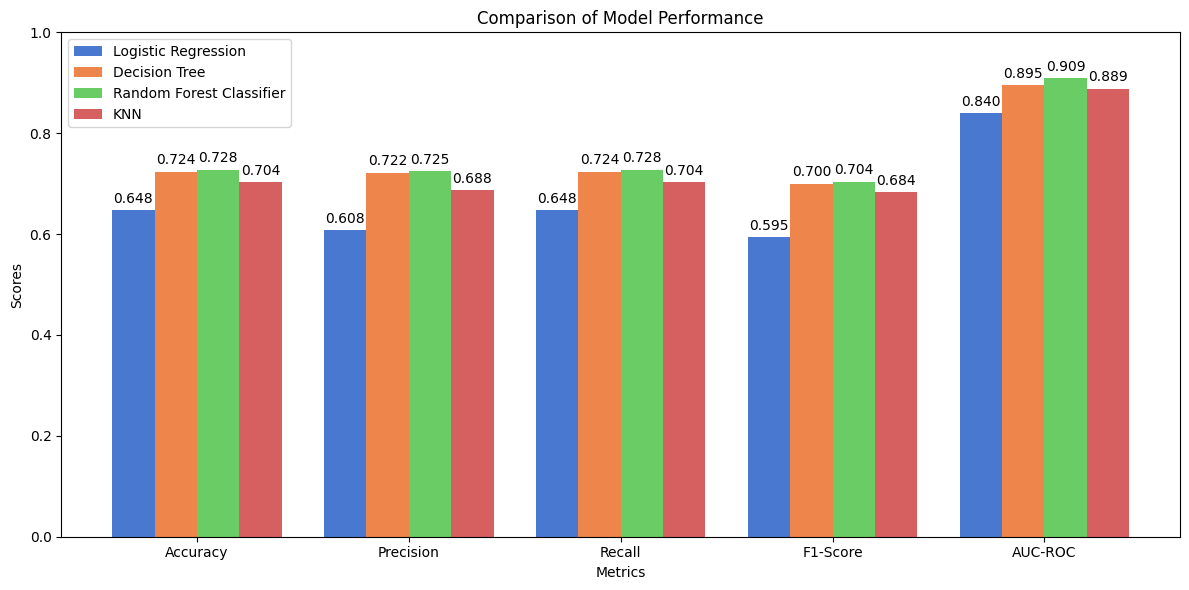

In [ ]:
metrics = list(results[models[0]].keys())  # Get metrics from the first model

# Prepare data for plotting
data = {metric: [results[model][metric] for model in models] for metric in metrics}

# Plotting
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

for i, model in enumerate(models):
    offset = (i - len(models) / 2 + 0.5) * width
    rects = ax.bar(x + offset, [results[model][metric] for metric in metrics], width, label=model)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for bars in ax.containers:
    autolabel(bars)
sns.set_palette("pastel")
fig.tight_layout()
plt.ylim(0, 1)  # Set y limits to 0 to 1
plt.show()

**Best Model for Diamond's Cut quality prediction**
1.   Accuracy - Random Forest Classifier has highest with 72.8%
2.   Preicision - Random Forest Classifier has highest with 72.5%
3. Recall - Random Forest Classifier has highest true positive rate with 72.8%
4. Also, AUC-ROC - Random Forest Classifier has the highest score of 90.9%

---


Hence, **Random Forest Classifier** is the best model to predict the cut quality of diamond compare to other classification and clustering models.

